# Group 10: Mental Health & Lifestyle


### Project Introduction

**Github Project Link:**

https://github.com/cs418-fa24/project-check-in-team-10

**Modeling Mental Health & Lifestyle Choice**\
This project explores the relationships between lifestyle choices and their significant impact on individuals' overall mental health. Our team believes that this is an important investigation, with the potential to provide actionable insights and support informed decisions that promote mental well-being. We analyze data from the 2023 Behavioral Risk Factor Surveillance System (BRFSS) which includes over 430,000 participants across the U.S. This survey data contains health related behaviors and outcomes from various factors.
Our primary research question is **How do lifestyle choices and circumstances impact self-reported mental health?**. We are interested in identifying patterns that reveal whether engaging in a healthier lifestyle correlates with better mental health outcomes, against the number of days per month respondents report experiencing poor mental health. To answer our question, we explore the potential cases and relationships between these factors accounting for demographic factors: age, education, and income. We hope to generate insights that not only support individual decision-making but also inform public health recommendations, ultimately promoting wellness through positive lifestyle changes.

### Data Introduction and Summary

As discussed in the introduction, out data was sourced from the CDC's BRFSS, with 430,000 participants and over 350 features. With a plethora of features and missing data, we implemented these steps:
* Narrow down the features from 350 to 19
* Impute null values based on:
    - Randomly sampling from an observed distribution
    - Remove rows of columns for which there are less than 10,000 null values

Original data cleaning and impuration can be referenced in the `ProgressReport.ipynb`

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
pd.read_csv("imputed_data.csv")

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,DIABETE4,MARITAL,EDUCA,EMPLOY1,INCOME3,FLUSHOT7,HIVTST7,_HLTHPL1,_TOTINDA,_RACEGR3,_AGEG5YR,_EDUCAG,_SMOKER3,DRNKANY6,_RFBING6
0,1.0,2.0,0.0,0.0,1.0,1.0,5.0,7.0,9.0,2.0,2.0,1.0,2.0,1.0,13.0,3.0,4.0,2.0,1.0
1,1.0,2.0,0.0,0.0,3.0,2.0,5.0,7.0,9.0,1.0,2.0,1.0,1.0,1.0,13.0,3.0,4.0,2.0,1.0
2,1.0,4.0,6.0,2.0,3.0,3.0,4.0,7.0,2.0,1.0,2.0,1.0,1.0,2.0,13.0,2.0,3.0,2.0,1.0
3,1.0,2.0,2.0,0.0,3.0,1.0,5.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,12.0,3.0,4.0,2.0,1.0
4,1.0,4.0,0.0,0.0,1.0,3.0,5.0,8.0,7.0,2.0,2.0,1.0,1.0,1.0,12.0,3.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392510,78.0,3.0,12.0,30.0,3.0,2.0,5.0,1.0,5.0,2.0,1.0,1.0,1.0,2.0,10.0,3.0,4.0,1.0,2.0
392511,78.0,2.0,0.0,0.0,3.0,5.0,6.0,1.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0,4.0,2.0,1.0
392512,78.0,2.0,10.0,0.0,3.0,1.0,6.0,1.0,10.0,1.0,1.0,1.0,1.0,5.0,7.0,4.0,4.0,1.0,1.0
392513,78.0,3.0,0.0,0.0,1.0,5.0,6.0,4.0,3.0,2.0,2.0,1.0,1.0,2.0,10.0,4.0,4.0,2.0,1.0


### EDA and Visualizations

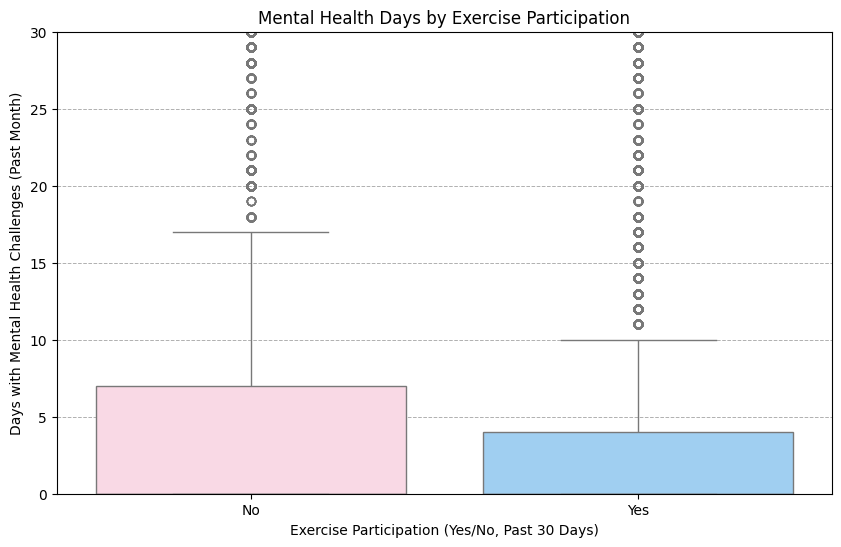

In [31]:
# This dataset adds the labels for all of the values
EDA_data = pd.read_csv('imputed_and_labeled_data.csv') 
exercise_colors = ["#FFD3E4", "#92D1FF"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='_TOTINDA', y='MENTHLTH', data=EDA_data, palette=exercise_colors)
plt.ylim(0, 30)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.title('Mental Health Days by Exercise Participation')
plt.xlabel('Exercise Participation (Yes/No, Past 30 Days)')
plt.ylabel('Days with Mental Health Challenges (Past Month)')
plt.show()

**Why:** I wanted to plot these factors to see if the data from this dataset would support the idea that exercise helps improve mental health.\
**How:** I plotted the self-reported bad mental health days per month against the self-reported exercise participation within the last month.

**Hypothesis:** I assumed that since we had a lot of data, our findings would support the idea that exercise helps improve mental health.\
**Results:** The people who reported that they did not exercise within the past month were more likely to have worse self-reported mental health. This may have some bias because it could also include individuals who are not physically capable of exercising, which may cause worse mental health instead of the lack of exercise itself. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. Since these factors are self-reported, we also have no guarantee that people shared correct or accurate information.

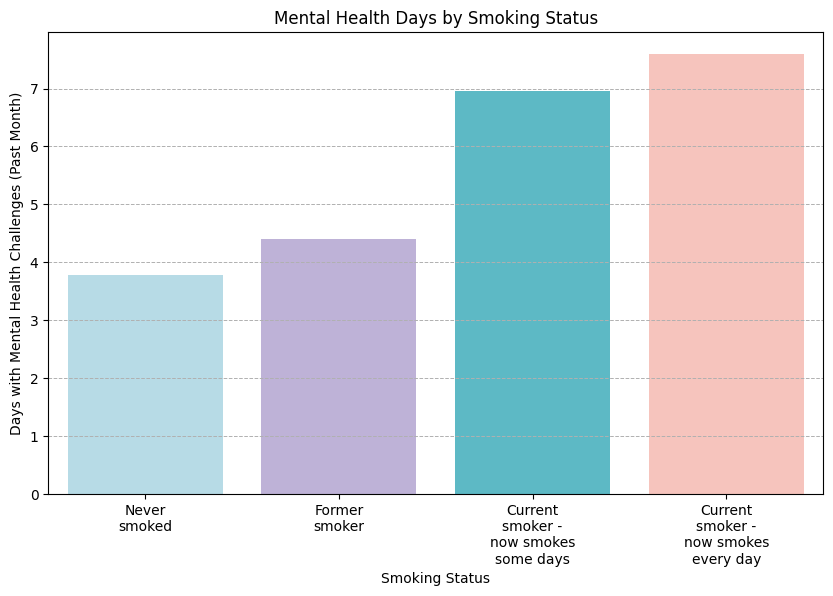

In [32]:
smoking_colors = ["#AFDFEE", "#BCACDD", "#4BC6D7", "#FFBDB4"]
order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']
wrapped_labels = [textwrap.fill(label, width=10) for label in order]
plt.figure(figsize=(10, 6))
sns.barplot(x='_SMOKER3', y='MENTHLTH', data=EDA_data, palette=smoking_colors, order=order, ci=None)
plt.title('Mental Health Days by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Days with Mental Health Challenges (Past Month)')
plt.xticks(ticks=range(len(order)), labels=wrapped_labels)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

**Why:** I wanted to plot these factors because I wanted to see the correlation between smoking and mental health.\
**How:** I plotted the self-reported bad mental health days per month with the self-reported smoking status

**Hypothesis:** I thought that there was a chance that the people who smoked would have better mental health because they have so much nicotine in their system, however, I also know that the withdrawals are not easy to deal with. I think that the factor I assumed to have the best self-reported mental health would be the people who never smoked though. 

**Results:** The people who reported that they did not smoke and the people who reported that they were former smokers had the best self-reported mental health. The people who only smoked some days had worse mental health with an average of about 7 mental health challenges per month and those who were everyday smokers averaged at 7.5 bad mental health days per month. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. This may also have some bias because these factors are self-reported, so we also have no guarantee that people shared correct or accurate information.

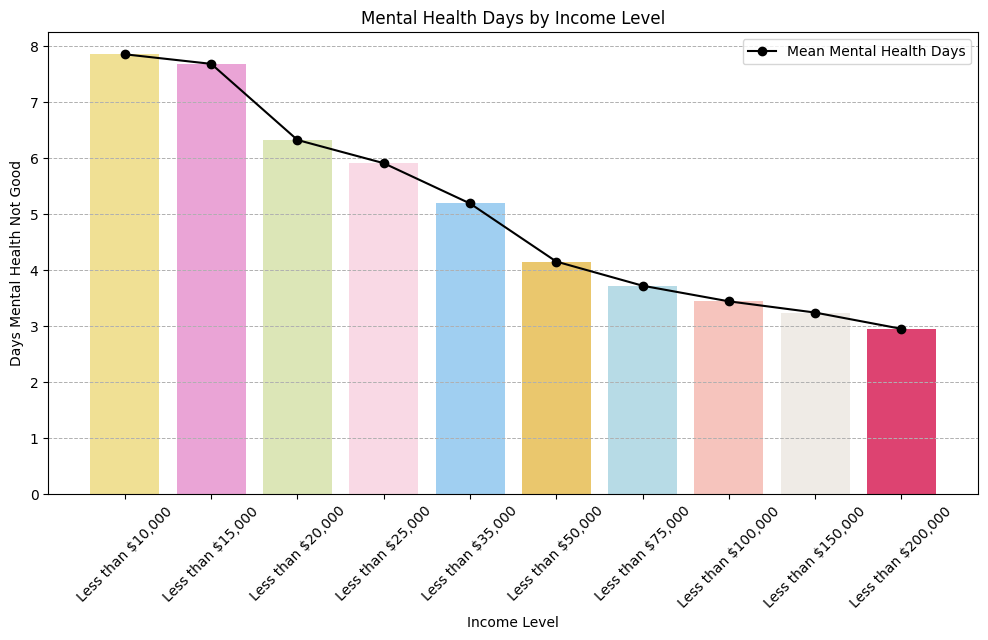

In [33]:
income_order = [ 'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 'Less than $75,000', 'Less than $100,000', 'Less than $150,000', 'Less than $200,000', '$200,000 or more']
income_palette =  ["#FFEA85", "#F698DB", "#E1EEAF", "#FFD3E4", "#92D1FF", "#FFD058", "#AFDFEE",  "#FFBDB4",  "#F1EBE4",  "#F72967", "#BCACDD"]
income_means = EDA_data.groupby('INCOME3')['MENTHLTH'].mean().reindex(income_order)

plt.figure(figsize=(12, 6))
sns.barplot(x='INCOME3', y='MENTHLTH', data=EDA_data, order=income_order, palette=income_palette, ci=None)
plt.plot(range(len(income_order)), income_means, color='black', marker='o', linestyle='-', label='Mean Mental Health Days')
plt.title('Mental Health Days by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Days Mental Health Not Good')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

**Why:** I wanted to plot these factors because I wanted to see the correlation between income levels and mental health.\
**How:** I plotted the self-reported bad mental health days per month with the self-reported imcome level

**Hypothesis:** I thought that the less that someone makes, the worse their mental health would be. However, I wanted to test to see if the data backed up the idea that "money doesnt buy happiness"

**Results:** The people who reported having made 0-15000 per year had the worst self reported mental health with an average of 7.5 to 8 bad mental health days per month. As the income levels went up, it seemed like the number of bad mental health datys went down. There were a lot of outliers so we can't say for sure that the correlation can be attributed to causation. This may also have some bias because these factors are self-reported, so we also have no guarantee that people shared correct or accurate information.

### ML and Statistics

In the Machine Learning section, we utilize Logistic Regression as baseline to classify mental health status as "Good" or "Bad," aiming to understand how various predictors influence outcomes. This model provides interpretability, allowing us to test hypotheses about the role of lifestyle and demographic factors in mental health. 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the cleaned dataset
imputed_df = pd.read_csv('imputed_data.csv')
imputed_df.columns

Index(['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'DIABETE4', 'MARITAL',
       'EDUCA', 'EMPLOY1', 'INCOME3', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
       '_TOTINDA', '_RACEGR3', '_AGEG5YR', '_EDUCAG', '_SMOKER3', 'DRNKANY6',
       '_RFBING6'],
      dtype='object')

In [35]:
# We need to create binary target variable for classification
# Threshold for mental health is 10 days of poor mental health
imputed_df['MENTHLTH_BINARY'] = np.where(imputed_df['MENTHLTH'] >= 10, 1, 0)  # 1 = Bad, 0 = Good

In [36]:
# Select features and target variable
features = [
    '_AGEG5YR', '_RACEGR3', 'EDUCA', 'INCOME3', 'MARITAL', 'EMPLOY1', 
    'GENHLTH', 'PHYSHLTH', 'DIABETE4', 'FLUSHOT7', 'HIVTST7', '_HLTHPL1',
    '_TOTINDA', '_EDUCAG', '_SMOKER3', 'DRNKANY6', '_RFBING6'
]
X = imputed_df[features]
y = imputed_df['MENTHLTH_BINARY']

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression**

In [52]:
# Train the Baseline Model: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


              precision    recall  f1-score   support

           0       0.85      0.97      0.91     97203
           1       0.61      0.21      0.31     20552

    accuracy                           0.84    117755
   macro avg       0.73      0.59      0.61    117755
weighted avg       0.81      0.84      0.80    117755

[[94395  2808]
 [16201  4351]]


In [38]:
#Logistic Regression Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.83710177 0.83772595 0.83851573 0.83652854 0.83691069]
Mean cross-validation score: 0.8373565341451918


**Summary of Logistic Regression Model Performance**  
The Logistic Regression model achieved 0.84 accuracy but struggled with "Bad" mental health cases, with a recall of 0.21 and an F1 score of 0.31. While it excelled in classifying "Good" cases (recall 0.97), misclassifying 16,201 "Bad" cases exposed its bias toward the majority class, emphasizing the limitations of relying solely on accuracy.

**Random Forest:**
We will now use Random Forest to capture complex, non-linear patterns that Logistic Regression might miss. Its ability to handle feature interactions makes it more robust for identifying "Bad" mental health cases, improving detection of previously misclassified instances.

In [53]:
# Train Model: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
print (classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     97203
           1       0.51      0.27      0.35     20552

    accuracy                           0.83    117755
   macro avg       0.69      0.61      0.63    117755
weighted avg       0.80      0.83      0.81    117755

[[92033  5170]
 [15064  5488]]


We also did CV with the Random Forest which supports the overall findings, code can be referenced in `ProgressReport.ipynb`:
+ Best Cross-Validation Score: 0.8400640550645798

**Summary of Random Forest Model Performance**  
The Random Forest model achieved 0.83 accuracy and improved recall to 0.27, better identifying "Bad" mental health cases than Logistic Regression. It correctly classified 5,488 "Bad" cases but struggled with 15,064 False Negatives and 5,170 False Positives, showing a trade-off between higher recall and reduced precision (0.51).

**Undersampling Technique:**
We noted a data imbalance to handle our data imbalance, we have a larger class of "good mental health". To balance our data we chose to use the data preprocessing technique of undersampling to randomly decrease the size of the majority class to match the size of the minority class. 

In [46]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
under = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)
print("Before:", y_train.value_counts())
print("After:", pd.Series(y_train_resampled).value_counts())

Before: 0    226103
1     48657
Name: MENTHLTH_BINARY, dtype: int64
After: 0    48657
1    48657
Name: MENTHLTH_BINARY, dtype: int64


In [63]:
# Train Model:Logistic Regression model Undersampling
lr_under = LogisticRegression(max_iter=1000, random_state=42)
lr_under.fit(X_train_resampled, y_train_resampled)
y_pred_lr_under = lr_under.predict(X_test)
print("Logistic Regression with Undersampling:")
print(classification_report(y_test, y_pred_lr_under))


Logistic Regression with Undersampling:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     97203
           1       0.35      0.70      0.47     20552

    accuracy                           0.73    117755
   macro avg       0.64      0.72      0.64    117755
weighted avg       0.82      0.73      0.75    117755



In [64]:
# Train Model: Random Forest model Undersampling
rf_under = RandomForestClassifier(n_estimators=100, random_state=42)
rf_under.fit(X_train_resampled, y_train_resampled)
y_pred_rf_under = rf_under.predict(X_test)
print("\nRandom Forest with Under Sampling:")
print(classification_report(y_test, y_pred_rf_under))


Random Forest with Under Sampling:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79     97203
           1       0.33      0.71      0.45     20552

    accuracy                           0.70    117755
   macro avg       0.62      0.70      0.62    117755
weighted avg       0.82      0.70      0.73    117755



**Summary of Overall Findings:** 
We started with Logistic Regression and Random Forest, which showed strong accuracy but struggled with low recall and F1 scores for "Bad" mental health cases. Undersampling significantly improved recall for both models, enhancing detection of "Bad" cases despite a slight drop in precision, demonstrating the value of addressing class imbalance.

### Results and Conclusion

In [61]:
# Create a Table with the results Logistic Regression, Random Forest, Logistic Regression (Under), Random Forest (Under)
results = {
    'Model': ['Logistic Regression', 'Logistic Regression (Under)', 'Random Forest', 'Random Forest (Under)'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_lr_under), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rf_under)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr_under), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf_under)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr_under), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf_under)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr_under), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf_under)]
}
results_df = pd.DataFrame(results)

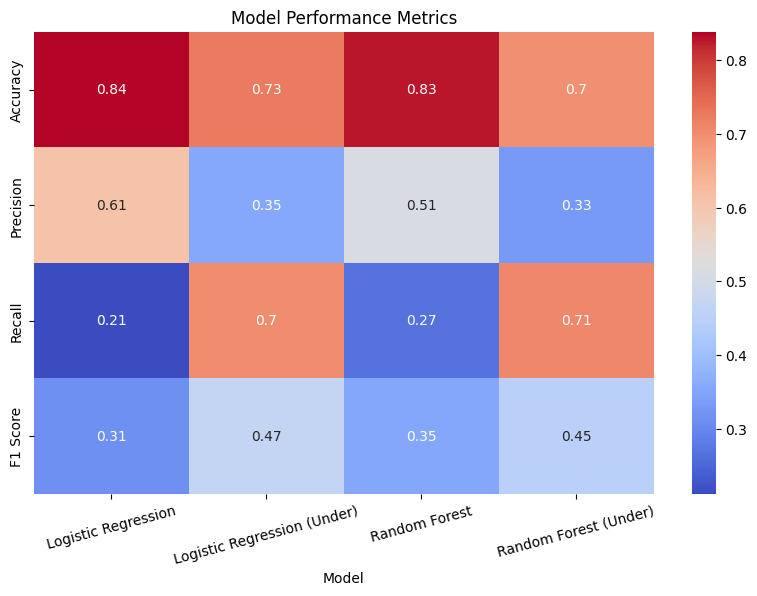

In [62]:
#Visualize the results in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Model Performance Metrics')
plt.xticks(rotation=15)
plt.show()

**Best Performing Model and Improvements:**
The heatmap visualization highlights the comparative performance of different models, showcasing how undersampling drastically improved recall metrics. The Logistic Regression Undersampling model achieved a recall of 0.70 compared to the baseline Logistic Regression's 0.21, a substantial improvement in detecting "bad" mental health cases. This improvement demonstrates the importance of addressing class imbalance, as seen in the F1 Score increase from 0.31 to 0.47. Similarly, Random Forest with undersampling also showed enhanced recall, though its precision and F1 Score remained slightly lower than Logistic Regression's undersampling approach.

**Real-World Implications:**
High recall enables early detection of poor mental health, allowing timely interventions, better resource allocation, and reduced risk of missed diagnoses in critical cases like suicide prevention.